In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#1.Load Data

In [2]:
df = pd.read_csv('Salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
X = df.Level
X

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: Level, dtype: int64

In [4]:
y = df.Salary
y

0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64

Text(0, 0.5, 'Salary')

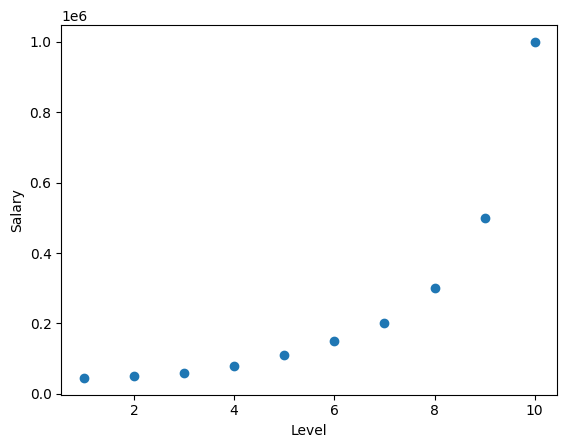

In [5]:
plt.scatter(X, y)
plt.xlabel("Level")
plt.ylabel("Salary")

#2.Linear Regression

In [6]:
def r2score(y_pred, y):
    rss = np.sum((y_pred - y) ** 2)
    tss = np.sum((y-y.mean()) ** 2)

    r2 = 1 - (rss / tss)
    return r2

In [7]:
class LinearRegression:
    def __init__(self, X_data, y_target, learning_rate=0.01, num_epochs=10000):
        self.X_data = X_data
        self.y_target = y_target
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.num_samples = self.X_data.shape[0]

        # Initial Coefficients
        self.theta = np.random.randn(self.X_data.shape[1])
        self.losses = []

    def compute_loss(self, y_pred, y_target):
        loss = (y_pred-y_target)*(y_pred-y_target)
        loss = np.mean(loss)
        return loss

    def predict(self, X_data):
        y_pred = X_data.dot(self.theta)
        return y_pred

    def fit(self):
        for epoch in range(self.num_epochs):
            # predict
            y_pred = self.predict(self.X_data)

            # compute loss
            loss = self.compute_loss(y_pred, self.y_target)
            self.losses.append(loss)

            # compute gradient
            k = 2*(y_pred-self.y_target)
            gradients = self.X_data.T.dot(k)/self.num_samples

            # update weight
            self.theta = self.theta - self.learning_rate*gradients

            print(f'Epoch: {epoch} - Loss: {loss}')

        return {
            'loss': sum(self.losses)/len(self.losses),
            'weight': self.theta
        }

In [8]:
X_linear = X.values.reshape(-1, 1)
X_linear = np.hstack((np.ones((X_linear.shape[0], 1)), X_linear))

In [9]:
X_linear

array([[ 1.,  1.],
       [ 1.,  2.],
       [ 1.,  3.],
       [ 1.,  4.],
       [ 1.,  5.],
       [ 1.,  6.],
       [ 1.,  7.],
       [ 1.,  8.],
       [ 1.,  9.],
       [ 1., 10.]])

In [10]:
linear_model = LinearRegression(X_linear, y)
linear_model.fit()

Epoch: 0 - Loss: 142928586966.96085
Epoch: 1 - Loss: 40361953860.62069
Epoch: 2 - Loss: 35586204937.42271
Epoch: 3 - Loss: 35297828253.71432
Epoch: 4 - Loss: 35215919167.79323
Epoch: 5 - Loss: 35144058733.40734
Epoch: 6 - Loss: 35073230141.40413
Epoch: 7 - Loss: 35003014903.479416
Epoch: 8 - Loss: 34933389074.79173
Epoch: 9 - Loss: 34864346852.48448
Epoch: 10 - Loss: 34795883305.50964
Epoch: 11 - Loss: 34727993581.91692
Epoch: 12 - Loss: 34660672872.1552
Epoch: 13 - Loss: 34593916407.06383
Epoch: 14 - Loss: 34527719457.458305
Epoch: 15 - Loss: 34462077333.79161
Epoch: 16 - Loss: 34396985385.82196
Epoch: 17 - Loss: 34332439002.283276
Epoch: 18 - Loss: 34268433610.558544
Epoch: 19 - Loss: 34204964676.355896
Epoch: 20 - Loss: 34142027703.387352
Epoch: 21 - Loss: 34079618233.05033
Epoch: 22 - Loss: 34017731844.111744
Epoch: 23 - Loss: 33956364152.394855
Epoch: 24 - Loss: 33895510810.46861
Epoch: 25 - Loss: 33835167507.33974
Epoch: 26 - Loss: 33775329968.147278
Epoch: 27 - Loss: 33715993953

{'loss': 26812265889.81248,
 'weight': array([-195333.33333333,   80878.78787879])}

In [11]:
y_pred = linear_model.predict(X_linear)

In [12]:
r2score(y_pred, y)

0.6690412331929895

In [13]:
linear_model.theta

array([-195333.33333333,   80878.78787879])

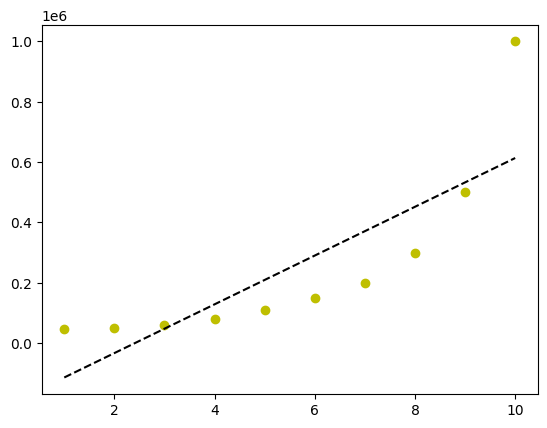

In [14]:
plt.plot(X, y, 'yo', X, linear_model.theta[1]*X + linear_model.theta[0], '--k')
plt.show()

#3.Polymial Regression

In [15]:
def create_polynomial_features(X, degree=2):
    """Creates the polynomial features
    Args:
        X: A array tensor for the data.
        degree: A intege for the degree of
        the generated polynomial function.
    """
    X_new = X
    for d in range(2, degree+1):
        X_new = np.c_[X_new, np.power(X, d)]
    return X_new

##3.1.Polymial Regression with degree = 2

In [16]:
X_poly = create_polynomial_features(X, degree=2)
X_poly

array([[  1,   1],
       [  2,   4],
       [  3,   9],
       [  4,  16],
       [  5,  25],
       [  6,  36],
       [  7,  49],
       [  8,  64],
       [  9,  81],
       [ 10, 100]], dtype=int64)

In [17]:
X_poly = np.hstack((np.ones((X_poly.shape[0], 1)), X_poly))
X_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [18]:
poly_model = LinearRegression(X_poly, y, learning_rate=0.0001, num_epochs=10000)
poly_model.fit()

Epoch: 0 - Loss: 142948093797.7606
Epoch: 1 - Loss: 45677571946.52566
Epoch: 2 - Loss: 22699759077.235435
Epoch: 3 - Loss: 17268965983.14482
Epoch: 4 - Loss: 15982565109.949768
Epoch: 5 - Loss: 15675022157.984858
Epoch: 6 - Loss: 15598677207.218287
Epoch: 7 - Loss: 15576942259.14001
Epoch: 8 - Loss: 15568109415.838282
Epoch: 9 - Loss: 15562327785.242035
Epoch: 10 - Loss: 15557270704.703918
Epoch: 11 - Loss: 15552388641.191828
Epoch: 12 - Loss: 15547551797.638226
Epoch: 13 - Loss: 15542729513.405859
Epoch: 14 - Loss: 15537914542.656414
Epoch: 15 - Loss: 15533105169.841055
Epoch: 16 - Loss: 15528300985.601131
Epoch: 17 - Loss: 15523501889.08844
Epoch: 18 - Loss: 15518707852.325562
Epoch: 19 - Loss: 15513918864.55076
Epoch: 20 - Loss: 15509134919.07288
Epoch: 21 - Loss: 15504356010.166677
Epoch: 22 - Loss: 15499582132.339499
Epoch: 23 - Loss: 15494813280.158087
Epoch: 24 - Loss: 15490049448.207663
Epoch: 25 - Loss: 15485290631.08229
Epoch: 26 - Loss: 15480536823.382513
Epoch: 27 - Loss: 1

{'loss': 11093733639.229326,
 'weight': array([ 14601.56067513, -47838.38985093,  12584.36249685])}

In [19]:
y_pred = poly_model.predict(X_poly)
r2score(y_pred, y)

0.873608300587036

In [20]:
poly_model.theta

array([ 14601.56067513, -47838.38985093,  12584.36249685])

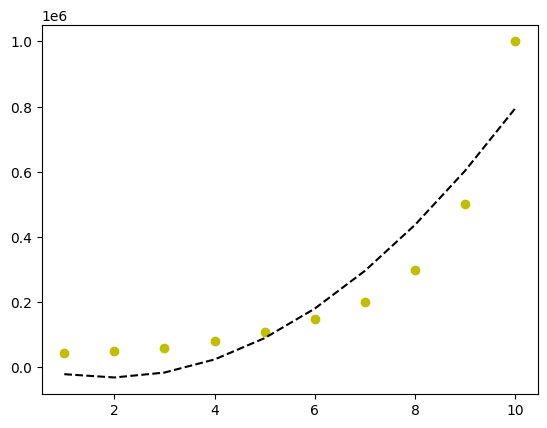

In [21]:
X_plot = df.Level
y_func = poly_model.theta[2]*X*X + poly_model.theta[1]*X + poly_model.theta[0]
plt.plot(X_plot, y, 'yo', X, y_func, '--k')
plt.show()

##3.2.Polymial Regression with degree = 3

In [22]:
X_poly = create_polynomial_features(X, degree=3)
X_poly

array([[   1,    1,    1],
       [   2,    4,    8],
       [   3,    9,   27],
       [   4,   16,   64],
       [   5,   25,  125],
       [   6,   36,  216],
       [   7,   49,  343],
       [   8,   64,  512],
       [   9,   81,  729],
       [  10,  100, 1000]], dtype=int64)

In [23]:
X_poly = np.hstack((np.ones((X_poly.shape[0], 1)), X_poly))
X_poly

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [24]:
poly_model = LinearRegression(X_poly, y, learning_rate=0.0000001, num_epochs=10000)
poly_model.fit()

Epoch: 0 - Loss: 142544183660.31534
Epoch: 1 - Loss: 131901564631.76704
Epoch: 2 - Loss: 122094708987.733
Epoch: 3 - Loss: 113057984054.39311
Epoch: 4 - Loss: 104730911305.57195
Epoch: 5 - Loss: 97057761606.44304
Epoch: 6 - Loss: 89987182242.82976
Epoch: 7 - Loss: 83471853239.97346
Epoch: 8 - Loss: 77468170670.66101
Epoch: 9 - Loss: 71935954833.2314
Epoch: 10 - Loss: 66838181346.42466
Epoch: 11 - Loss: 62140733361.40885
Epoch: 12 - Loss: 57812173232.64852
Epoch: 13 - Loss: 53823532119.5077
Epoch: 14 - Loss: 50148116110.483116
Epoch: 15 - Loss: 46761327572.54231
Epoch: 16 - Loss: 43640500529.93529
Epoch: 17 - Loss: 40764748970.74312
Epoch: 18 - Loss: 38114827065.94468
Epoch: 19 - Loss: 35673000365.50959
Epoch: 20 - Loss: 33422927109.489075
Epoch: 21 - Loss: 31349548859.771587
Epoch: 22 - Loss: 29438989720.54975
Epoch: 23 - Loss: 27678463473.025047
Epoch: 24 - Loss: 26056188002.843773
Epoch: 25 - Loss: 24561306447.564278
Epoch: 26 - Loss: 23183814536.430214
Epoch: 27 - Loss: 21914493636.

{'loss': 6979139602.7519045,
 'weight': array([   1.86431572, -100.31780294, -535.16376754,  889.81584976])}

In [25]:
y_pred = poly_model.predict(X_poly)
r2score(y_pred, y)

0.9180439302166781

In [26]:
poly_model.theta

array([   1.86431572, -100.31780294, -535.16376754,  889.81584976])

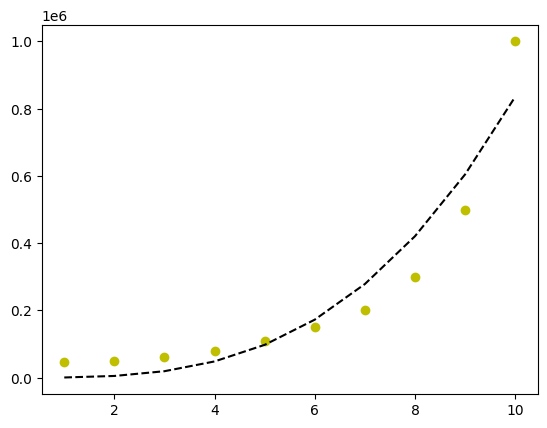

In [27]:
X_plot = df.Level
y_func = poly_model.theta[3]*X*X*X + poly_model.theta[2]*X*X + poly_model.theta[1]*X + poly_model.theta[0]
plt.plot(X_plot, y, 'yo', X, y_func, '--k')
plt.show()